In [26]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler

#Download Dataset
path = kagglehub.dataset_download("radheshyamkollipara/bank-customer-churn")

## Data cleaning

In [27]:
# Loading Data
data = pd.read_csv(f"{path}/Customer-Churn-Records.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [28]:
df = data.drop(columns=['RowNumber', 'CustomerId','Surname', 'Complain'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [29]:
card_types = {'DIAMOND': 4, 'PLATINUM': 3, 'GOLD': 2, 'SILVER': 1}
gender_types = {'Female': 1, 'Male': 0}

df['Card Type'] = df['Card Type'].map(card_types)
df['Gender'] = df['Gender'].map(gender_types)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,1,42,2,0.00,1,1,1,101348.88,1,2,4,464
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,3,4,456
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1,3,4,377
3,699,France,1,39,1,0.00,2,0,0,93826.63,0,5,2,350
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,5,2,425


In [30]:
#Get dummies encoding
dummies = pd.get_dummies(df['Geography'], prefix='Geography')

df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['Geography'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,2,4,464,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,3,4,456,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,3,4,377,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,5,2,350,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,5,2,425,False,False,True


## Machine Learning

In [32]:
training_data = df.drop(columns=['Exited'])
testing_data = df['Exited']
X_train, X_test, Y_train, Y_test = train_test_split(training_data, testing_data, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
lr_model = LogisticRegression(penalty=None, max_iter=10000)
lr_model.fit(X_train, Y_train)
y_pred = lr_model.predict(X_test)
auc_lr = roc_auc_score(Y_test, y_pred)
print(f"LogisticRegression AUC = {auc_lr}")

LogisticRegression AUC = 0.5828294152016227


In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
y_pred_knn = knn_model.predict(X_test)

auc_knn = roc_auc_score(Y_test, y_pred_knn)
print(f"KNeighbors AUC = {auc_knn}")

KNeighbors AUC = 0.5106428459459331


In [22]:
dt_model = DecisionTreeClassifier(random_state=15, max_depth=20)
dt_model.fit(X_train, Y_train)
Y_pred_dt = dt_model.predict(X_test)

auc_dt = roc_auc_score(Y_test, Y_pred_dt)
print(f"Decision Tree AUC = {auc_dt}")

Decision Tree AUC = 0.6860578163917087


In [23]:
xgb_model = xgb.XGBClassifier(max_depth=2, n_estimators=50)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = dt_model.predict(X_test)

auc_xgb = roc_auc_score(Y_test, Y_pred_xgb)
print(f"xgboost AUC = {auc_xgb}")

xgboost AUC = 0.6860578163917087


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)

auc_rf = roc_auc_score(Y_test, Y_pred_xgb)
print(f"Random Forest AUC = {auc_rf}")

Random Forest AUC = 0.6860578163917087


## Results - AUC Evaluation

1. xgb = 0.6860578163917087
2. rf = 0.6860578163917087
3. tr = 0.6860578163917087
4. lreg = 0.5926686839225969
5. knn = 0.5106428459459331


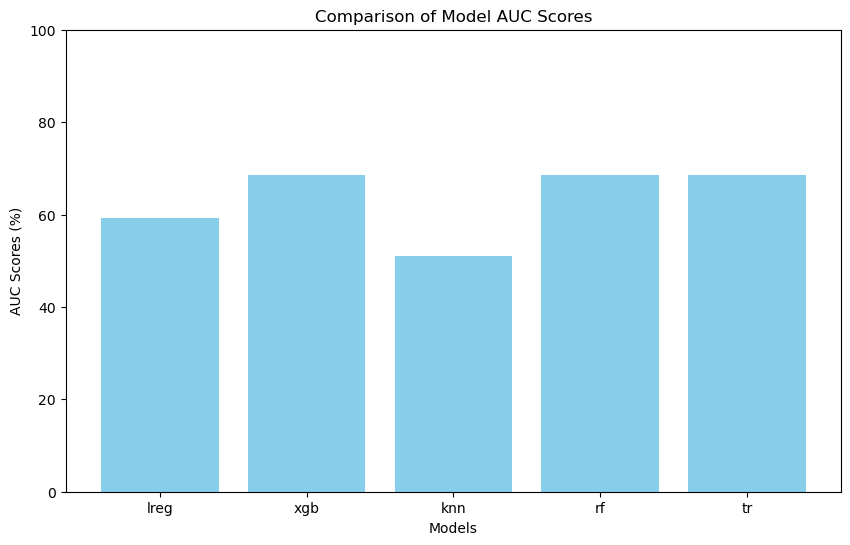

In [ ]:
results = {
    "lreg": auc_lr,
    "xgb": auc_xgb,
    "knn": auc_knn,
    "rf": auc_rf,
    "tr": auc_dt
}
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

for i, (model, auc) in enumerate(sorted_results, 1):
    print(f"{i}. {model} = {auc}")

results_percentage = {model: score * 100 for model, score in results.items()}
models = list(results_percentage.keys())
scores = list(results_percentage.values())

# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('AUC Scores (%)')
plt.title('Comparison of Model AUC Scores')
plt.ylim(0, 100)  # Assuming AUC scores are in percentage
plt.show()



## Conclution

Without complains the models are less effective, further cross validation with different hyperparameters and techniques like 5 fold cross validation will be added in model v3

Continue with model v3